<a href="https://colab.research.google.com/github/ZahraBehzad/learn-CNN/blob/main/basicCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - loss: 13354.2871
Epoch 2/200
1/1 - 2s - 2s/step - loss: 310.5221
Epoch 3/200
1/1 - 1s - 1s/step - loss: 2732.6328
Epoch 4/200
1/1 - 3s - 3s/step - loss: 956.2893
Epoch 5/200
1/1 - 3s - 3s/step - loss: 201.2824
Epoch 6/200
1/1 - 1s - 1s/step - loss: 491.8779
Epoch 7/200
1/1 - 1s - 1s/step - loss: 752.5576
Epoch 8/200
1/1 - 2s - 2s/step - loss: 608.6321
Epoch 9/200
1/1 - 2s - 2s/step - loss: 258.2496
Epoch 10/200
1/1 - 2s - 2s/step - loss: 275.8324
Epoch 11/200
1/1 - 1s - 1s/step - loss: 453.1997
Epoch 12/200
1/1 - 2s - 2s/step - loss: 306.7534
Epoch 13/200
1/1 - 3s - 3s/step - loss: 167.6030
Epoch 14/200
1/1 - 1s - 1s/step - loss: 199.1004
Epoch 15/200
1/1 - 1s - 1s/step - loss: 222.3532
Epoch 16/200
1/1 - 2s - 2s/step - loss: 187.0396
Epoch 17/200
1/1 - 2s - 2s/step - loss: 157.3932
Epoch 18/200
1/1 - 2s - 2s/step - loss: 202.6696
Epoch 19/200
1/1 - 3s - 3s/step - loss: 166.4850
Epoch 20/200
1/1 - 3s - 3s/step - loss: 144.1467
Epoch 21/200
1/1 - 1s - 1s/step - loss

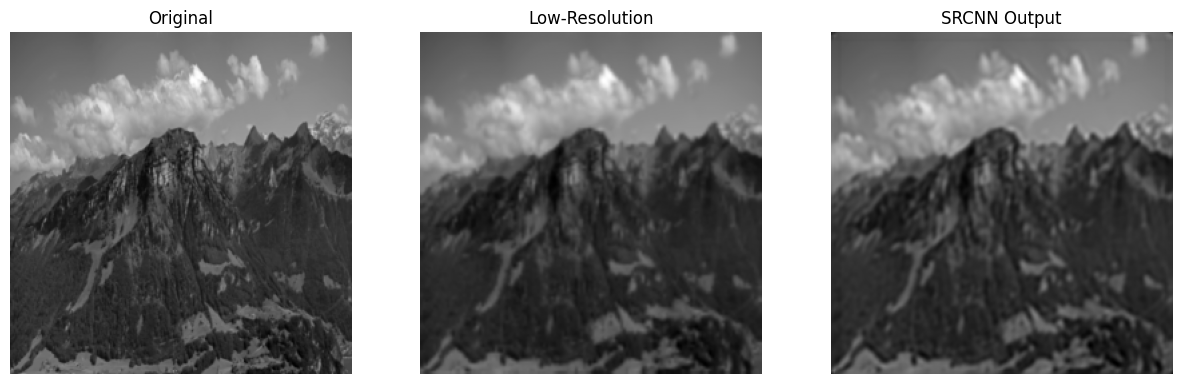

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models

# تبدیل تصویر به کیفیت پایین
def prepare_image(img, scale=2):
    img_y = color.rgb2ycbcr(img)[:, :, 0]
    img_y = transform.resize(img_y, (img_y.shape[0]//scale, img_y.shape[1]//scale), anti_aliasing=True)
    img_y = transform.resize(img_y, (img_y.shape[0]*scale, img_y.shape[1]*scale), anti_aliasing=True)
    return img_y

# بارگذاری تصویر
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/3/3f/Fronalpstock_big.jpg')
img = transform.resize(img, (256, 256), anti_aliasing=True)
lr_img = prepare_image(img)

# ساخت مدل SRCNN
model = models.Sequential()
model.add(layers.Conv2D(64, (9, 9), activation='relu', padding='same', input_shape=(None, None, 1)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(1, (5, 5), activation='linear', padding='same'))

model.compile(optimizer='adam', loss='mse')

# آماده‌سازی داده‌ها
x_train = lr_img[np.newaxis, ..., np.newaxis].astype(np.float32)
y_train = color.rgb2ycbcr(img)[:, :, 0][np.newaxis, ..., np.newaxis].astype(np.float32)

# آموزش مدل
model.fit(x_train, y_train, epochs=200, verbose=2)

# پیش‌بینی
pred_img = model.predict(x_train)[0, ..., 0]

# ارزیابی
true_img = color.rgb2ycbcr(img)[:, :, 0].astype(np.float32)

print("PSNR:", psnr(true_img, pred_img, data_range=255))
print("SSIM:", ssim(true_img, pred_img, data_range=255))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(true_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low-Resolution')
plt.imshow(lr_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(pred_img, cmap='gray')
plt.axis('off')

plt.show()


استفاده از دیتاست images-91

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 - 9s - 383ms/step - loss: 2905.0762
Epoch 2/100
23/23 - 3s - 134ms/step - loss: 376.1362
Epoch 3/100
23/23 - 1s - 30ms/step - loss: 210.3857
Epoch 4/100
23/23 - 1s - 30ms/step - loss: 119.9866
Epoch 5/100
23/23 - 1s - 55ms/step - loss: 80.2291
Epoch 6/100
23/23 - 1s - 31ms/step - loss: 60.8077
Epoch 7/100
23/23 - 1s - 54ms/step - loss: 52.7249
Epoch 8/100
23/23 - 1s - 30ms/step - loss: 47.5889
Epoch 9/100
23/23 - 1s - 30ms/step - loss: 44.2537
Epoch 10/100
23/23 - 1s - 55ms/step - loss: 42.1844
Epoch 11/100
23/23 - 1s - 55ms/step - loss: 40.0322
Epoch 12/100
23/23 - 1s - 30ms/step - loss: 38.7796
Epoch 13/100
23/23 - 1s - 30ms/step - loss: 48.5841
Epoch 14/100
23/23 - 1s - 30ms/step - loss: 41.3430
Epoch 15/100
23/23 - 1s - 30ms/step - loss: 35.8407
Epoch 16/100
23/23 - 1s - 55ms/step - loss: 34.4978
Epoch 17/100
23/23 - 1s - 30ms/step - loss: 33.7809
Epoch 18/100
23/23 - 1s - 30ms/step - loss: 33.3737
Epoch 19/100
23/23 - 1s - 31ms/step - loss: 32.9387
Epoch 20/100
2

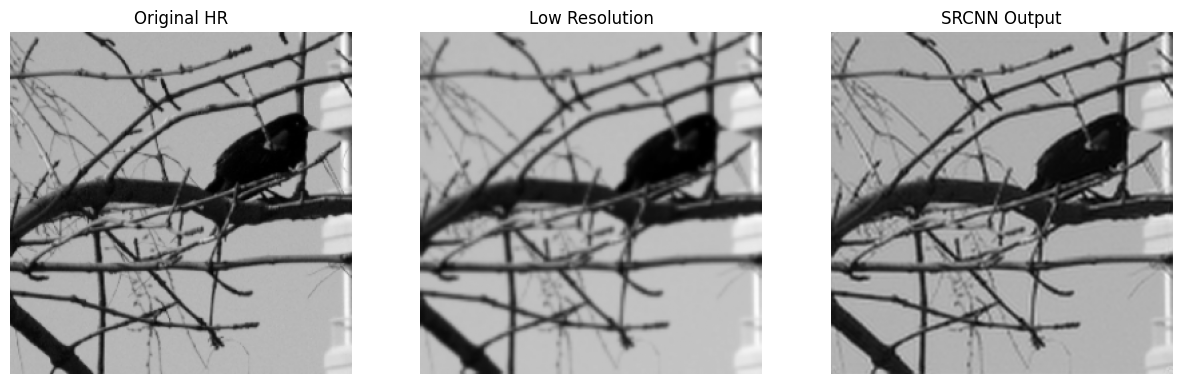

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Conv2D(64, (9,9), activation='relu', padding='same', input_shape=(None, None, 1)),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


Analysis of the First Output (Model Training Results)
1. Model Training:
Decrease in Loss Value: The loss value decreased with each epoch, indicating that the model is learning effectively. At the beginning of the training, the loss was quite high (2905.07), but gradually decreased to 23.8 by the final epoch. This indicates that the model is improving over time.

Loss Behavior: In some epochs, the loss value increases again (for example, in epochs 56, 57, 58). This might be due to fluctuations during the learning process, which is common during more complex stages of training. Overall, the consistent decrease in most epochs is a good sign.

2. PSNR and SSIM:
PSNR (-13.55): This value is very negative, which indicates that the model is not effectively recovering the details of the image. Ideally, this value should be positive and relatively high to show that the predicted image is close to the original one. A very low negative value likely points to issues in data preprocessing or model design. This suggests a need to review the training process or model settings (such as optimizer selection, layer configurations, or input data) for potential improvements.

SSIM (0.82): This value is fairly good, suggesting that the model has preserved some structural features of the image. The closer the SSIM value is to 1, the better the structural quality of the recovered image. A value of 0.82 is reasonable for a SRCNN model, but there is still room for improvement.

3. Conclusion:
Overall, the model has performed reasonably well in preserving the structural features of the image (based on SSIM), but its ability to recover image details is relatively weak (due to the negative PSNR).

To improve PSNR, you might want to experiment with:

Increasing the number of epochs

Modifying the model architecture (number of filters, filter size, number of layers)

Trying advanced optimization techniques (such as other optimizers or hyperparameter tuning).

Reviewing how the data is preprocessed and improving the quality of the Low-Resolution images.

استفاده از دیتاست DIV2K_train_HR

Epoch 1/100
200/200 - 13s - 64ms/step - loss: 219.0846
Epoch 2/100
200/200 - 15s - 75ms/step - loss: 70.7929
Epoch 3/100
200/200 - 10s - 51ms/step - loss: 69.5487
Epoch 4/100
200/200 - 10s - 52ms/step - loss: 62.1274
Epoch 5/100
200/200 - 10s - 51ms/step - loss: 58.2915
Epoch 6/100
200/200 - 6s - 31ms/step - loss: 57.1842
Epoch 7/100
200/200 - 6s - 32ms/step - loss: 78.5819
Epoch 8/100
200/200 - 6s - 32ms/step - loss: 62.3114
Epoch 9/100
200/200 - 6s - 32ms/step - loss: 57.3274
Epoch 10/100
200/200 - 6s - 32ms/step - loss: 60.0075
Epoch 11/100
200/200 - 10s - 52ms/step - loss: 56.2201
Epoch 12/100
200/200 - 10s - 51ms/step - loss: 55.9592
Epoch 13/100
200/200 - 10s - 51ms/step - loss: 70.7855
Epoch 14/100
200/200 - 10s - 51ms/step - loss: 55.8751
Epoch 15/100
200/200 - 6s - 32ms/step - loss: 56.1355
Epoch 16/100
200/200 - 10s - 51ms/step - loss: 58.9353
Epoch 17/100
200/200 - 6s - 32ms/step - loss: 55.4477
Epoch 18/100
200/200 - 10s - 52ms/step - loss: 56.9490
Epoch 19/100
200/200 - 10

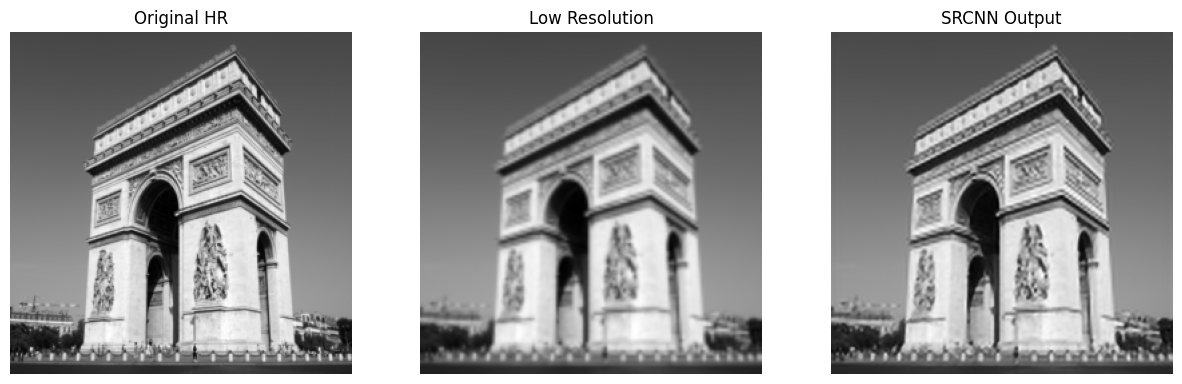

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob


# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/DIV2K_train_HR/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


Analysis of the Second Output (Model Training Results)
1. Model Training Overview:
Loss Behavior:
The loss fluctuates across epochs, starting at a high value of 219.08 in Epoch 1 and eventually stabilizing around 54.39 by Epoch 100. This suggests the model is gradually learning, but it encounters some fluctuations during the training process.

The loss decreases significantly during the initial epochs, indicating that the model is making noticeable improvements early on.

There are several increases in loss, especially around Epochs 7, 25, 43, 54, and 73, which may indicate instability or overfitting at those points.

Despite these fluctuations, the general trend shows a decline in loss towards the end of the training, indicating that the model is effectively learning the underlying patterns over time.

PSNR and SSIM:
PSNR (-17.97): The negative PSNR value suggests that the model's output is significantly different from the ground truth. A negative value indicates poor image recovery, meaning that the model is not effectively reconstructing the high-frequency details or fine textures of the image. This could imply issues with model architecture, learning rate, or training data.

SSIM (0.90): The SSIM value is relatively high at 0.90, which indicates that the structural similarity between the predicted and the original image is good. This suggests that the model is capturing the overall structure and shape of the image but might be missing fine-grained details, which aligns with the low PSNR value.

2. Key Insights:
The model is able to preserve the structural features of the image well, as reflected in the high SSIM value, but it struggles with fine details, as indicated by the very negative PSNR.

The fluctuating loss values imply that the model is not consistently improving. This could be addressed by:

Training for more epochs or tweaking the learning rate to reduce instability.

Using data augmentation or more diverse training data to prevent overfitting and improve generalization.

Experimenting with model architecture to improve detail recovery, such as increasing the number of layers or changing the convolutional filter sizes.

3. Next Steps:
Further Fine-tuning: Given the negative PSNR, it's recommended to investigate and fine-tune the model's architecture and training process (e.g., try different optimizers or regularization techniques).

Increase Epochs/Adjust Learning Rate: If the model continues to show instability, try training for more epochs or adjusting the learning rate for smoother convergence.

Examine Data Preprocessing: It may also help to analyze the data preprocessing steps, ensuring the low-resolution images are well-suited for training.

# 📚 Complete Explanation of the SRCNN Code for Super-Resolution

This code creates a simple SRCNN model whose goal is to enhance image quality. Below is a detailed, line-by-line explanation of the code:

---

## 1. Importing Libraries

- `os`: Working with file paths.
- `numpy`: Numerical operations on arrays.
- `matplotlib.pyplot`: Displaying images.
- `skimage.io, skimage.color, skimage.transform`: For reading images, color conversion, and resizing.
- `skimage.metrics`: For calculating PSNR and SSIM (quality evaluation).
- `tensorflow` and `keras`: For building and training the neural network model.
- `glob`: To find image files with specific extensions.

---

## 2. Preparing Low-Resolution Images (Function `prepare_lr`)

- The input image is converted to the YCbCr color space, and only the luminance (Y) channel is kept.
- The image is downscaled (low resolution).
- The image is resized back to the original size, but its quality is degraded.

---

## 3. Loading Images (Function `load_images`)

- All `.bmp`, `.png`, `.jpg` images in the specified directory are loaded.
- Each image is resized to 256×256 to have a standard size for training.

---

## 4. Preparing Input and Output Data

- `x_train`: Low-resolution images.
- `y_train`: High-resolution original images.
- Since the images are grayscale, the third dimension (channel) is added using `np.expand_dims(..., -1)` to make the array shape `(height, width, 1)`.
- This is necessary because CNN models expect 3D input.

---

## 5. Building the SRCNN Model

- The model consists of 3 convolutional layers:
  - Layer 1: 64 filters of size 9×9 with ReLU activation.
  - Layer 2: 32 filters of size 5×5 with ReLU activation.
  - Layer 3: 1 filter of size 5×5 with linear activation (to reconstruct the output image).
- Using `padding='same'` ensures the output size matches the input size.

---

## 6. Compiling the Model

- The Adam optimizer is used for weight updates.
- The loss function is `mean squared error (MSE)` to compare the output with the original image.

---

## 7. Training the Model

- `batch_size=4`: 4 images are processed in each step.
- `epochs=100`: The entire dataset is trained for 100 epochs.
- `verbose=2`: Summary information about the training process is printed in the console.

---

## 8. Testing the Model on a Random Image

- A random image is selected.
- A low-resolution version of the image is prepared.
- The model makes a prediction on the image.
- The output image (`predicted`) is reconstructed.

---

## 9. Quality Evaluation

- PSNR: Peak Signal-to-Noise Ratio, the higher the better.
- SSIM: Structural Similarity Index, the closer to 1, the better the similarity between the predicted and original images.

---

## 10. Displaying Results

- Three images are displayed:
  - The original high-resolution image.
  - The low-resolution image.
  - The SRCNN model output.

---

# 🔥 Important Notes:

- The image channel refers to the information related to each color or luminance.
- Even grayscale images must have the shape `(height, width, 1)` for the CNN model to work correctly.
- The model is trained on the Y channel of YCbCr images because luminance information is more important for human perception.
